# Probabilidad en data science

$$
P = \frac{N° de sucesos exitosos}{N° de sucesos totales}
$$

## Escuelas de pensamiento
Bayesiana y frecuentista

## Axiomas
$$
0 \leq P \leq 1 dodne P=1 implica certeza y P=0 implica imposibilidad
$$

$$
Disjuntos \xrightarrow {} P(A \bigcup B)=P(A)+P(B)
$$


## Tipos de probabilidad
#### Conjunta (joint)
Regla del producto:
$$P(A,B)=P(A|B)P(B)$$
#### Marginal
$$P(B)=\sum_{b}P(A,B)$$
#### Condicional
$$P(A|B)$$

## Distribuciones
$X \hspace{1em} aleatoria \xrightarrow{} P(X=x)$
$$P=f(X)$$
$X \hspace{1em} variable \hspace{1em} aleatoria$
$x \hspace{1em} valores \hspace{1em} posibles \hspace{1em} en \hspace{1em}el \hspace{1em} espacio\hspace{1em} muestral$

Para variables continuas: $$ P(X\leq x) = \int\limits_{X\leq x} P(x) dx$$
Para variables discretas: $$P(X\leq x) = \sum_{X\leq x}P(X)$$

### Distribución de Bernoulli
Variables con ocurrencias binarias
$$P(X=1)=p$$
$$P(X=0)=1-p$$

Para n lanzamientos (de monedas por ejemplo):
$$P(k; n,p)={n\choose k}p^{k}(1-p)^{n-k}$$
tal que:
$${n\choose k}=\frac{n!}{k!(n-k)!}$$

In [1]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

In [2]:
def my_binomial(k, n, p):
    return factorial(n)/((factorial(k))*(factorial(n-k)))*pow(p,k)*pow(1-p, n-k)

In [41]:
dist = binom(3, 0.5) #se lanza 3 veces la mones y la probabilidad de cara es 50%
dist.pmf(2) #probabilidad de que 2 sean iguales

0.3750000000000001

In [40]:
5/16

0.3125

In [42]:
dist.cdf(2) #probabilidad de que salgan 2 o menos caras igales

0.875

In [43]:
7/8

0.875

In [6]:
#generadores aleatorios
p=0.5
n=3
binomial(n, p)

3

In [7]:
arr=[]
for _ in range(100):
    arr.append(binomial(n, p))

In [8]:
arr

[2,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 0,
 3,
 1,
 2,
 3,
 1,
 1,
 2,
 3,
 1,
 0,
 2,
 1,
 3,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 3,
 1,
 3,
 1,
 2,
 3,
 0,
 1,
 1,
 1,
 3,
 0,
 1,
 1,
 1,
 2,
 3,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 3,
 2,
 2,
 1,
 2,
 1,
 1]

In [11]:
def plot_hist(num_trials):
    values = [0,1,2, 3]
    arr=[]
    for _ in range(num_trials):
        arr.append(binomial(n,p))
    sim = np.unique(arr, return_counts=True)[1]/len(arr)
    teorica = [binom(3,0.5).pmf(k) for k in values]
    plt.bar(values, sim, color = "red")
    plt.bar(values, teorica, alpha=0.5, color="blue")
    plt.show()

In [10]:
np.unique(arr, return_counts=True)[1]/len(arr)

array([0.14, 0.42, 0.32, 0.12])

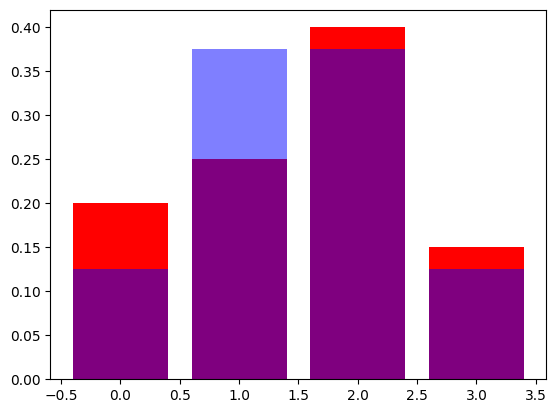

In [25]:
plot_hist(20)

### Distribución normal (gaussiana)

$$ P(X) = \frac{1}{\sigma \sqrt{ 2\pi} } exp {-\frac{1}{2}\bigg(\frac{X- \mu}{\sigma}\bigg)^2}$$

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [33]:
def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*pow((x-mu)/sigma,2))

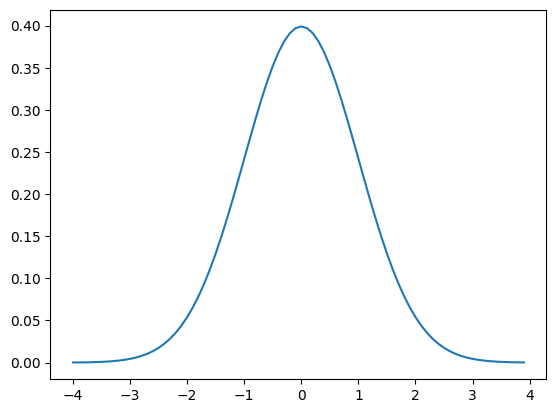

In [34]:
x = np.arange(-4, 4, 0.1)
y = gaussian(x, 0.0, 1.0)
plt.plot(x,y)

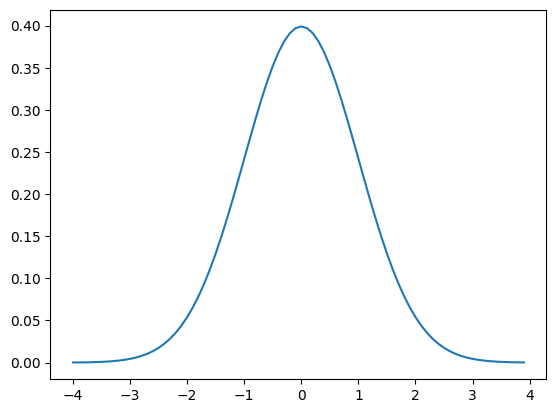

In [36]:
dist = norm(0,1)
x = np.arange(-4, 4, 0.1)
y =[dist.pdf(value) for value in x]
plt.plot(x,y)

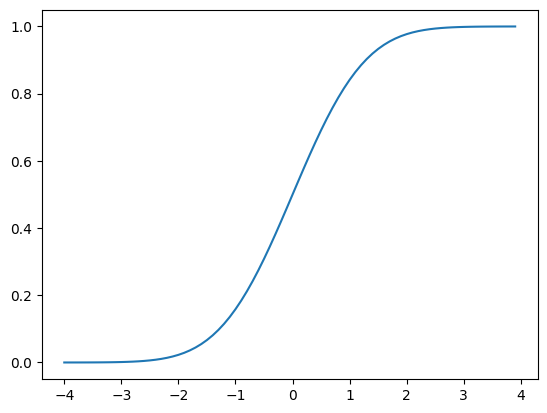

In [37]:
dist = norm(0,1)
x = np.arange(-4, 4, 0.1)
y =[dist.cdf(value) for value in x]
plt.plot(x,y)

## Estimación de máxima verosimilitud (MLE)
- escoger distribución
- elegir parámetros de la distribución
$$P(X;\theta) = L(X; \theta)$$

$$max \hspace{0.5em} L(X;\theta) \xrightarrow{} max \prod_{i}P(X_{i};\theta)$$

$$max \hspace{0.5em} log L(X;\theta) \xrightarrow{} max\sum_{i} log P(X_{i};\theta) $$

Se convierte a log debido al underflow (las pc tienen problemas para trabajar con múmeros muy pequeños, con los convierto los números pequeños en negativos pero grandes)

### Regresión lineal con MLE
$$y = b_{0}x+b_{1}$$
$$P(y|x) \xrightarrow{} \sum_{i}logP(y_{i}|x_{i};h)$$

Donde $h$ es el modelo que quiero ajustar, en este caso una función lineal.

Considerando que los datos se distribuyen mediante una gaussiana (es la función P de MLE)


### Regresión logística
Resuelve problemas de clasificación (es o no es).
En lugar de una función lineal se tiene un función sigmoide:
$$y = \frac{1}{1+exp(-x)}$$

## Teorema de Bayes

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
$P(B|A)$ verosimilitud
$P(A)$ probabilidad a priori
$P(B)$ evidencia
$P(A|B)$ probabilidad a posteriori

No dice cual es la probabilidad de que ocurra A luego de que ocurrio B

### MAP, probabilidad posterior al problema de Bayes
$$P(h|D)=\frac{P(D |h)P(h)}{P(D)}$$

$$maxP(h|D) \xrightarrow{} maxP(D|h)P(h)$$